<div style="border: solid green 2px; padding: 20px">

  <b>Overall Summary of the Project – Iteration 2</b><br><br>
  Hello Ivey, congratulations on submitting your project!<br>

  My name is <b>Victor Camargo</b> 
  (<a href="https://hub.tripleten.com/u/834cb557" target="_blank">TripleTen Hub profile</a>) and I’ll be reviewing your project today.<br>

  <b>What you did well:</b><br>
  ✅ You implemented a clear, reusable evaluation function and used it consistently, respected the provided train/test split, implemented text normalization and applied it before vectorization, and trained a TF-IDF plus Logistic Regression model that meets the required F1 score on the test set.<br>

  <b>Required fixes (only if red issues exist):</b><br>
  ⛔️ None, all previously reported red issues have been addressed.<br>

  <b>Project Status:</b><br>
  <div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
    <b>Approved</b>
  </div>

<div style="border: solid green 2px; padding: 20px">

  <b>Overall Summary of the Project – Iteration 1</b><br><br>
  Hello Ivey, congratulations on submitting your project!<br>

  My name is <b>Victor Camargo</b> 
  (<a href="https://hub.tripleten.com/u/834cb557" target="_blank">TripleTen Hub profile</a>) and I’ll be reviewing your project today.<br>

  <i>You can find my detailed feedback throughout the notebook, starting with comments labeled 
  <b>“Reviewer’s comment – Iteration 1”</b>.</i><br>

  <b>What you did well:</b><br>
  ✅ You implemented a clear, reusable evaluation function and used it to assess all models, and you trained a TF-IDF plus Logistic Regression model that meets the required F1 score on the test set.<br>

  <b>Required fixes (only if red issues exist):</b><br>
  ⛔️ Text normalization is incomplete and not applied consistently across training, test, and custom examples. Please implement full normalization (lowercase, remove punctuation and digits, collapse excessive whitespace), apply it before vectorization for both train and test, and use the same normalized text for the My Reviews predictions. Retrain the vectorizers and models and re-run the evaluation.<br>

  <b>Project Status:</b><br>
  <div class="alert alert-danger" style="border-left: 7px solid red; padding: 5px">
    <b>Needs Fixes</b>
  </div>

  <hr><b>Legend:</b><br>

  <div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 1:</b><br>
  Strong, correct solutions or good practices worth reusing.
  </div>

  <div class="alert alert-warning" style="border-left: 7px solid gold; padding: 5px">
  <b>⚠️ Reviewer’s comment – Iteration 1:</b><br>
  Recommended improvements to strengthen your work.
  </div>

  <div class="alert alert-danger" style="border-left: 7px solid red; padding: 5px">
  <b>⛔️ Reviewer’s comment – Iteration 1:</b><br>
  Required fixes. The project cannot be approved until these are addressed.
  </div>

  <div class="alert alert-info" style="border-left: 7px solid blue; padding: 5px">
  <b>Student’s Comment</b><br>
  You may add your own notes or explanations in a <b>Markdown cell</b> using:<br>
  <code>&lt;div class="alert alert-info" style="border-left: 7px solid blue"&gt;&lt;b&gt;Student’s Comment&lt;/b&gt;&lt;/div&gt;</code>
  </div>

  <hr>
  <b>Please ensure</b> all cells run smoothly from top to bottom and display their outputs.<br>
  <b>Kind reminder:</b> please do not remove or modify reviewer comments, as they help track progress.<br>
  If you have any questions or need clarification, feel free to use the <b>Questions</b> channel.

</div>

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

## Initialization

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load Data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t')
df_reviews.info()
print(f"Object Columns: {df_reviews.select_dtypes(include=['object']).columns}")
print(f"Numeric Columns: {df_reviews.select_dtypes(include=['number']).columns}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  float64
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: float64(2

In [5]:
df_reviews.head(1)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218.0,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335


In [6]:
#Checked List Of Primary Because Of Concerns With Seeing '$' & '15'
#list(df_reviews['primary_title'].unique())

#Check For Nan Values In 'end_year'
df_reviews['end_year'].value_counts(dropna=False)

\N      45052
2007      225
2008      190
2006      140
2009      130
2010      124
2003      102
2002       97
1996       96
2005       96
2004       84
2001       75
1995       69
1999       61
1983       55
1989       49
2012       47
2000       40
1985       40
1976       37
1987       35
1994       34
1986       33
2017       32
1998       27
1990       26
2011       22
1982       21
2013       19
2014       17
1975       17
1960       16
1984       16
1997       16
1981       16
1979       15
1973       15
1988       14
1991       14
1993       13
1977       10
1978        9
1974        7
1970        7
1972        7
1965        7
1969        6
1961        6
2020        6
2016        5
1957        5
1980        5
1955        4
2018        4
2019        4
1966        4
1962        3
1953        2
1968        2
1959        1
Name: end_year, dtype: int64

In [7]:
convert = ['end_year', 'runtime_minutes', 'votes']
# 'end_year' & 'runtimes_minutes' Need To Be Converted To Numeric
for col in convert:
    df_reviews[col] = (
        df_reviews[col]
        .replace(r'\\N', pd.NA, regex=True)
        .pipe(pd.to_numeric, errors='coerce')
        .astype('Int64')
    )

# 'idx' Need To Be Converted To Object
df_reviews['idx'] = df_reviews['idx'].astype('object')

In [8]:
#Recheck Data Types
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         2279 non-null   Int64  
 6   runtime_minutes  46843 non-null  Int64  
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  object 
dtypes: Int64(3),

In [9]:
df_reviews.head(1)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,<NA>,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335


In [10]:
#Check Shape
print(df_reviews.shape)

df_reviews.drop_duplicates()

print(df_reviews.shape)

(47331, 17)
(47331, 17)


## EDA

In [11]:
adult_list = ['title_type', 'genres', 'is_adult']
is_adult = df_reviews.groupby(adult_list)['average_rating'].mean()
print(is_adult.head(5))
print(f'is_adult Shape: {is_adult.shape}')

adult_avgratings = is_adult.xs(1, level='is_adult')

not_adult_avgratings = is_adult.xs(0, level='is_adult')

print('---------------------------------------------')
print('Adult Average Ratings Based On Genre')
print(adult_avgratings.head(12))
print(f'Shape: {adult_avgratings.shape}')
print('----------------------------------------------')
print('Not Adult Average Ratings Based On Genre')
print(not_adult_avgratings.head())
print(f'Shape: {not_adult_avgratings.shape}')

title_type  genres                      is_adult
movie       Action                      0           4.764840
            Action,Adventure            0           6.111290
            Action,Adventure,Animation  0           7.040404
            Action,Adventure,Biography  0           6.500000
            Action,Adventure,Comedy     0           4.923925
Name: average_rating, dtype: float64
is_adult Shape: (1122,)
---------------------------------------------
Adult Average Ratings Based On Genre
title_type    genres                
movie         Action,Crime              3.800000
              Adult,Comedy              6.800000
              Adult,Comedy,Drama        6.300000
              Adult,Comedy,Fantasy      6.225000
              Adult,Drama,Fantasy       6.300000
              Adult,Horror              3.476923
              Adult,Horror,Thriller     5.300000
              Drama                     5.455556
short         Adult,Short               5.800000
tvMiniSeries  Action,Adu

In [12]:
# Not Suprisingly, There Are Vast More Movie Genres That Are Non Adult Than Adult
# We Neeed To Match Genres So We Can Compare. Action, Crime & Drama Are Two We Can Check How The Distribution Changes Over Time Based On The Year Of The Movie

adult_drama = []
not_adult_drama = []

adult_actioncrime = []
not_adult_actioncrime = []

for _, row in df_reviews.iterrows():
    if row['is_adult'] == 1 and row['genres'] == 'Drama':
        adult_drama.append(row)
    elif row['is_adult'] == 0 and row['genres'] == 'Drama':
        not_adult_drama.append(row)
    elif row['is_adult'] == 1 and row['genres'] == 'Action,Crime':
        adult_actioncrime.append(row)
    elif row['is_adult'] == 0 and row['genres'] == 'Action,Crime':
        not_adult_actioncrime.append(row)

print(df_reviews.describe())
print('----------------------------------------------------------------')
print(df_reviews.corr())

adult_drama = pd.DataFrame(adult_drama)
not_adult_drama = pd.DataFrame(not_adult_drama)
adult_actioncrime = pd.DataFrame(adult_actioncrime)
not_adult_actioncrime = pd.DataFrame(not_adult_actioncrime)

         start_year     end_year  runtime_minutes      is_adult  \
count  47331.000000  2279.000000     46843.000000  47331.000000   
mean    1989.631235  1999.539710        98.759729      0.001732   
std       19.600364    11.846141        38.322569      0.041587   
min     1894.000000  1953.000000         1.000000      0.000000   
25%     1982.000000  1995.000000        87.000000      0.000000   
50%     1998.000000  2004.000000        95.000000      0.000000   
75%     2004.000000  2008.000000       109.000000      0.000000   
max     2010.000000  2020.000000      1140.000000      1.000000   

       average_rating         votes        rating           pos  
count    47329.000000  4.732900e+04  47331.000000  47331.000000  
mean         5.998278  2.556292e+04      5.484608      0.498954  
std          1.494289  8.367004e+04      3.473109      0.500004  
min          1.400000  9.000000e+00      1.000000      0.000000  
25%          5.100000  8.270000e+02      2.000000      0.000000  


In [13]:
adult_drama_counts = {}
for _, row in adult_drama.iterrows():
    year = row['start_year']
    if year in adult_drama_counts:
        adult_drama_counts[year] += 1
    else:
        adult_drama_counts[year] = 1

not_adult_drama_counts = {}
for _, row in not_adult_drama.iterrows():
    year = row['start_year']
    if year in not_adult_drama_counts:
        not_adult_drama_counts[year] += 1
    else:
        not_adult_drama_counts[year] = 1

adult_actioncrime_counts = {}
for _, row in adult_actioncrime.iterrows():
    year = row['start_year']
    if year in adult_actioncrime_counts:
        adult_actioncrime_counts[year] += 1
    else:
        adult_actioncrime_counts[year] = 1

not_adult_actioncrime_counts = {}

for _, row in not_adult_actioncrime.iterrows():
    year = row['start_year']
    if year in not_adult_actioncrime_counts:
        not_adult_actioncrime_counts[year] += 1
    else:
        not_adult_actioncrime_counts[year] = 1



adult_drama_counts = pd.Series(adult_drama_counts)
not_adult_drama_counts = pd.Series(not_adult_drama_counts)
adult_actioncrime_counts = pd.Series(adult_actioncrime_counts)
not_adult_actioncrime_counts = pd.Series(not_adult_actioncrime_counts)
print('Genre: Adult Drama Year Counts')
print(adult_drama_counts)
print('Genre: Non Adult Drama Year Counts')
print(not_adult_drama_counts)
print('Genre: Adult Action, Crime Year Counts')
print(adult_actioncrime_counts)
print('Genre: Non Adult Action, Crime Counts')
print(not_adult_actioncrime_counts)

Genre: Adult Drama Year Counts
1999    3
1970    2
1998    4
dtype: int64
Genre: Non Adult Drama Year Counts
1986     29
1994     33
2005    206
2006    191
2002    195
       ... 
1973      3
1929      1
1956     31
1943     21
1916      1
Length: 75, dtype: int64
Genre: Adult Action, Crime Year Counts
1971    2
dtype: int64
Genre: Non Adult Action, Crime Counts
2006     5
2000     4
1974     3
1997    21
1991    10
2007     5
1995     1
2005     1
dtype: int64


## Exploratory Data Analysis: Adult vs Non-Adult Titles

### Objective
The goal of this analysis was to compare rating distributions between adult and non-adult titles within the same genres across years.

---

### Findings

- There is a significant imbalance in sample sizes between adult and non-adult titles.
- Adult titles contain very few rating entries in comparison.
- Non-adult titles contain substantially more rating entries.
- Year coverage between groups does not consistently overlap.
- Some adult year groups contain extremely small sample sizes (e.g., 1–3 entries).

---

### Important Context

The counts generated in this analysis reflect the number of **rating entries**, not the number of films produced.

Therefore:

- The data represents user review activity.
- It reflects audience participation on the platform.
- It does not directly represent film production volume.

---

### Conclusion

The primary takeaway from this exploration is the structural imbalance in rating counts between adult and non-adult titles.

Even when comparing identical genres, non-adult titles consistently have significantly higher review representation across years.

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [14]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 1:</b><br>
  Well done implementing a single evaluate_model function that prints F1, accuracy, ROC AUC, average precision and also produces diagnostic plots. This gives you a consistent, reproducible way to compare models. Please keep using this function after you retrain models following the normalization fixes.
</div>

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [15]:
import re

def normalize_text(text: str) -> str:
    text = text.lower()
    text = re.sub(r'\d+', ' ', text)          # remove digits
    text = re.sub(r'[^\w\s]', ' ', text)      # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # collapse whitespace
    return text

df_reviews['review_norm'] = df_reviews['review'].astype(str).apply(normalize_text)

<div class="alert alert-danger" style="border-left: 7px solid red; padding: 5px">
  <b>⛔️ Reviewer’s comment – Iteration 1:</b><br>
  The normalization step is incomplete and not applied consistently. I see you created review_norm by lowercasing, but the required normalization also includes removing punctuation and digits and collapsing excessive whitespace. In addition, the TF-IDF for Model 1 was fit on the raw review column while some predictions use review_norm, which produces a mismatch between training and inference pipelines.  

  To fix this please:
  1. Implement a single normalization function that lowercases, removes punctuation and digits, and collapses repeated whitespace.  
  2. Apply that function to the text used for fitting TF-IDF and training models for both train and test sets before vectorization.  
  3. Ensure the same normalization is applied to the My Reviews examples before calling transform or predict_proba.  
  4. Retrain the TF-IDF vectorizers and models and re-run evaluate_model to confirm results.  

  After these changes, confirm the test F1 is still at least 0.85 and update the conclusions if calibration or performance changed.
</div>

In [16]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

y_train = df_reviews_train['pos']
y_test = df_reviews_test['pos']
X_train = df_reviews_train.drop(columns=['pos'])
X_test = df_reviews_test.drop(columns=['pos'])

print(df_reviews_train.shape)
print(df_reviews_test.shape)
print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)

(23796, 18)
(23535, 18)
(23796,) (23796, 17)
(23535,) (23535, 17)


<div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 1:</b><br>
  You respected the provided train and test split by selecting rows with ds_part and separating features and target. This prevents data leakage and is implemented correctly.
</div>

## Working with models

### Model 0 - Constant

In [17]:
from sklearn.dummy import DummyClassifier

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


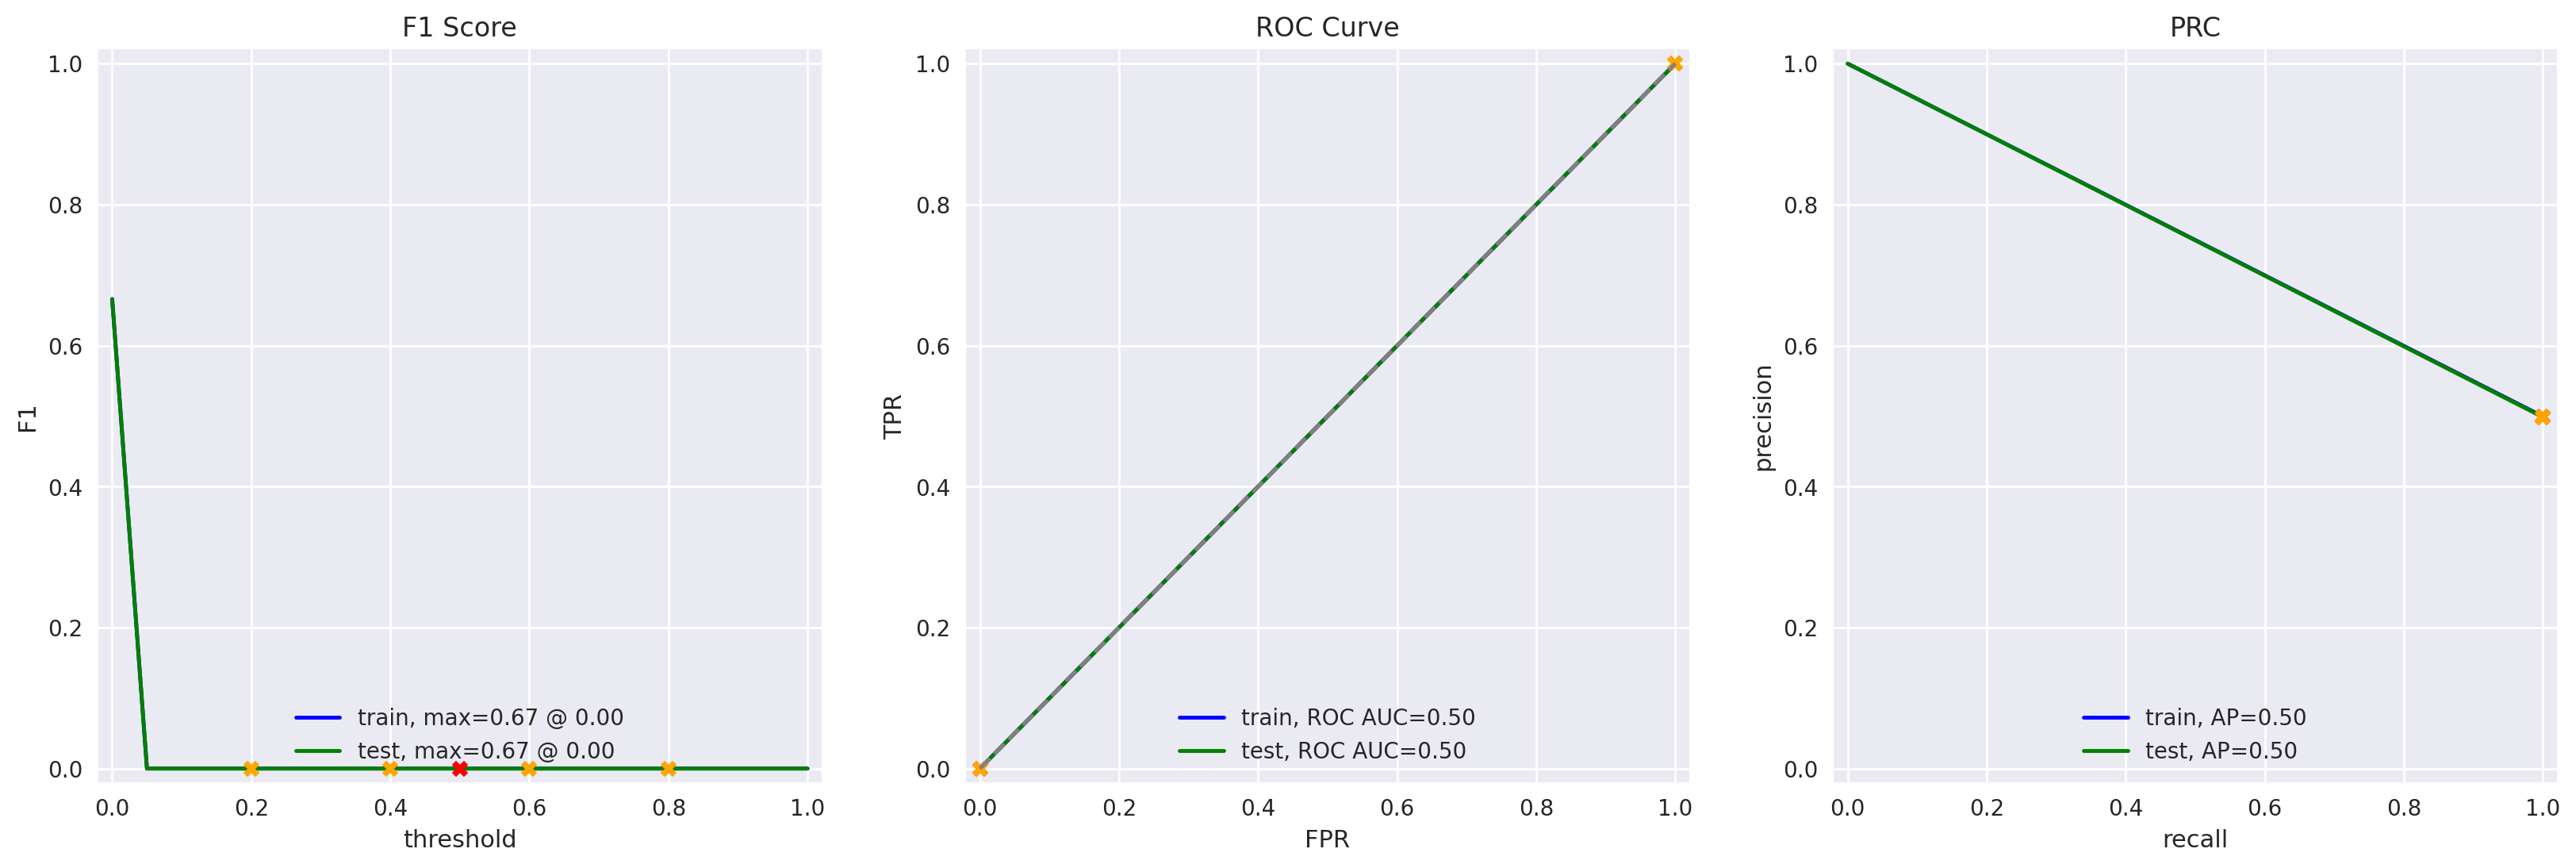

In [18]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)
evaluate_model(dummy_clf, X_train, y_train, X_test, y_test)

### Model 1 - NLTK, TF-IDF and LR

In [19]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

(23796,) (23796,)
(23535,) (23535,)
          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


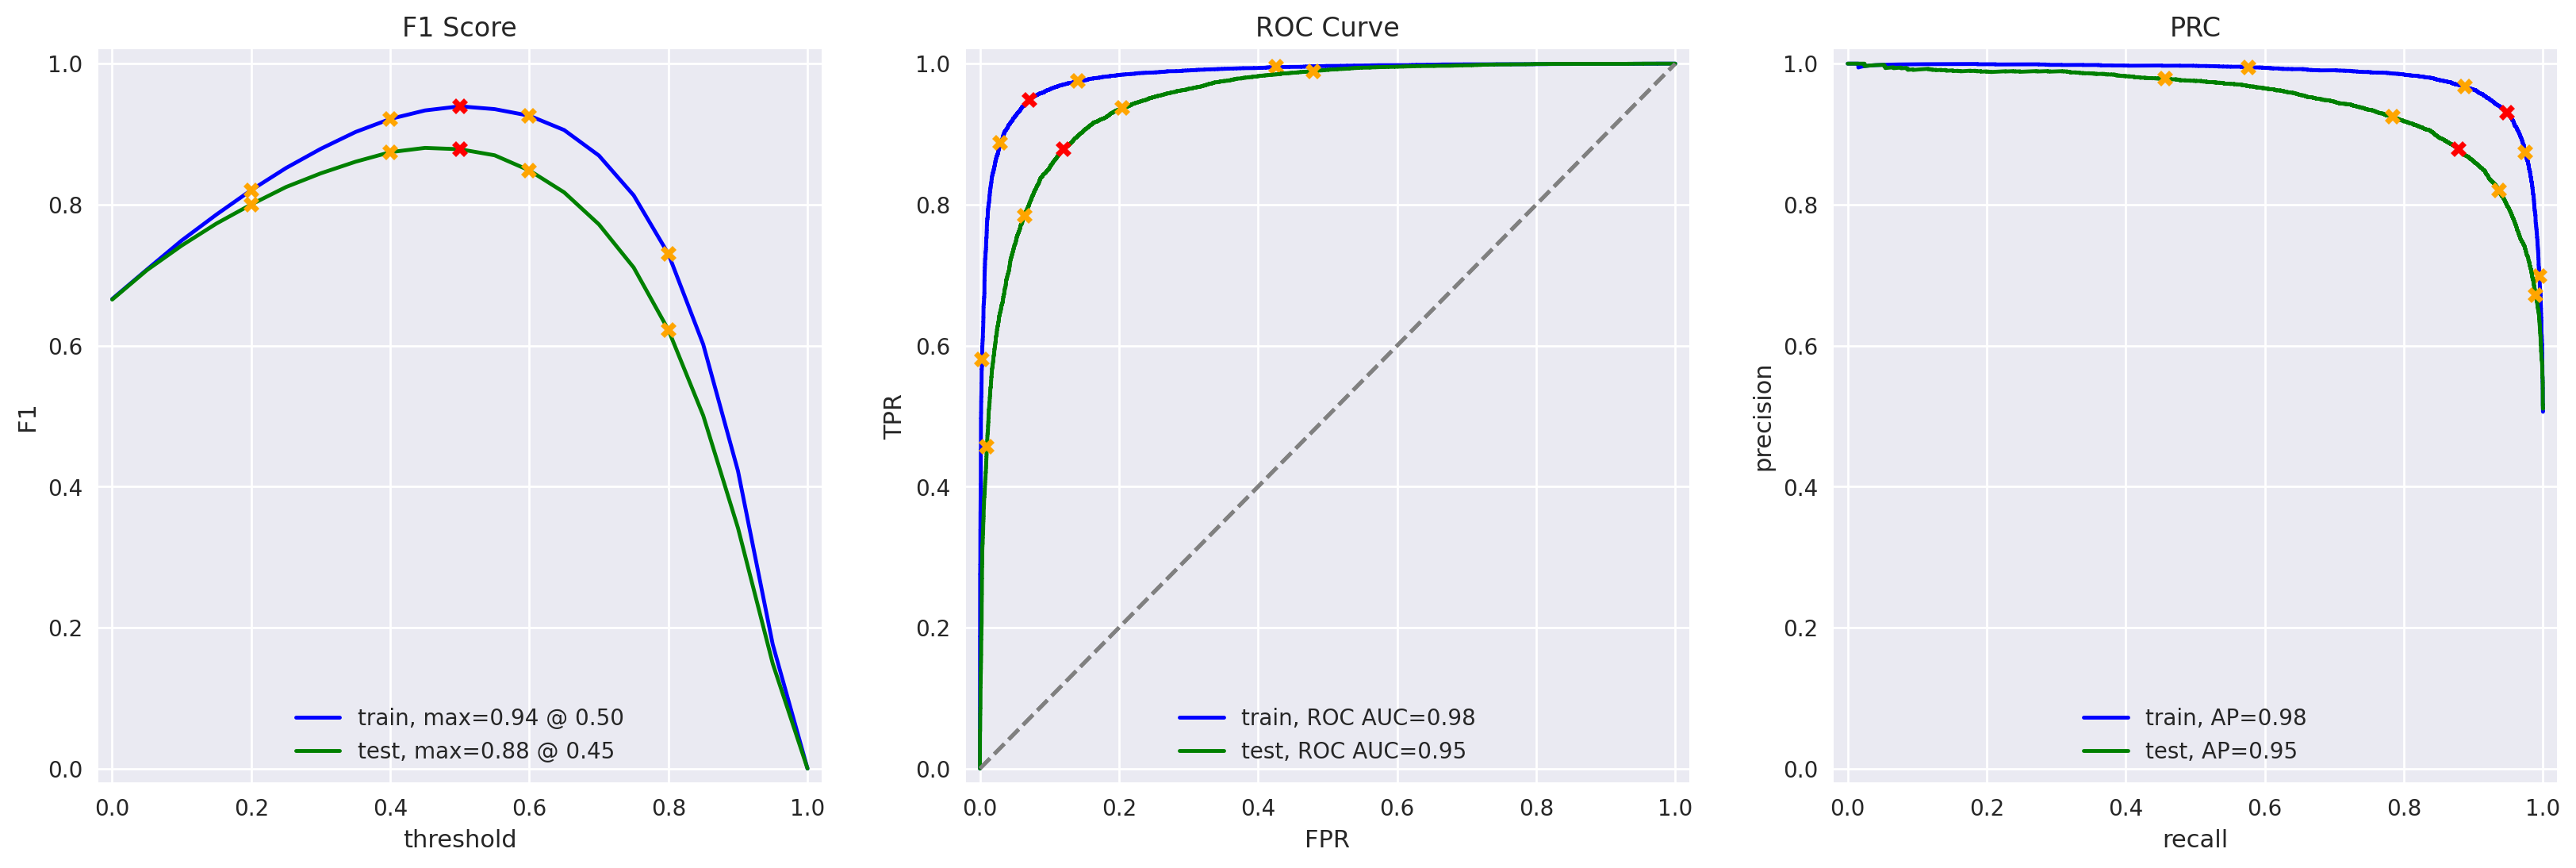

In [20]:
TEXT_COL = 'review_norm'
TARGET_COL = 'pos'

X_train_text = df_reviews_train[TEXT_COL].astype(str)
X_test_text  = df_reviews_test[TEXT_COL].astype(str)

y_train = df_reviews_train[TARGET_COL].astype(int)
y_test  = df_reviews_test[TARGET_COL].astype(int)

print(X_train_text.shape, y_train.shape)
print(X_test_text.shape, y_test.shape)

tfidf_1 = TfidfVectorizer(stop_words="english", max_features=100000)

X_train_tfidf_1 = tfidf_1.fit_transform(X_train_text)
X_test_tfidf_1  = tfidf_1.transform(X_test_text)

model_1 = LogisticRegression(max_iter=1000, n_jobs=-1)
model_1.fit(X_train_tfidf_1, y_train)

evaluate_model(model_1, X_train_tfidf_1, y_train, X_test_tfidf_1, y_test)


<div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 1:</b><br>
  Nice job, the TF-IDF plus Logistic Regression model achieved the project requirement of F1 at or above 0.85 on the test set. This is a solid baseline. Once you apply the consistent normalization and retrain, please confirm this performance remains and keep the evaluation outputs in the notebook.
</div>

### Model 2 - spaCy, TF-IDF and LR

In [21]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

In [22]:
def text_preprocessing_2(text):
    if text is None:
        return ""
    text = str(text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_space]
    return " ".join(tokens)

In [23]:
X_train_spacy = X_train_text.apply(text_preprocessing_2)
X_test_spacy  = X_test_text.apply(text_preprocessing_2)


In [24]:
tfidf_2 = TfidfVectorizer(stop_words="english", max_features=100000)

X_train_tfidf_2 = tfidf_2.fit_transform(X_train_spacy)
X_test_tfidf_2  = tfidf_2.transform(X_test_spacy)


          train  test
Accuracy   0.93  0.87
F1         0.93  0.87
APS        0.98  0.94
ROC AUC    0.98  0.95


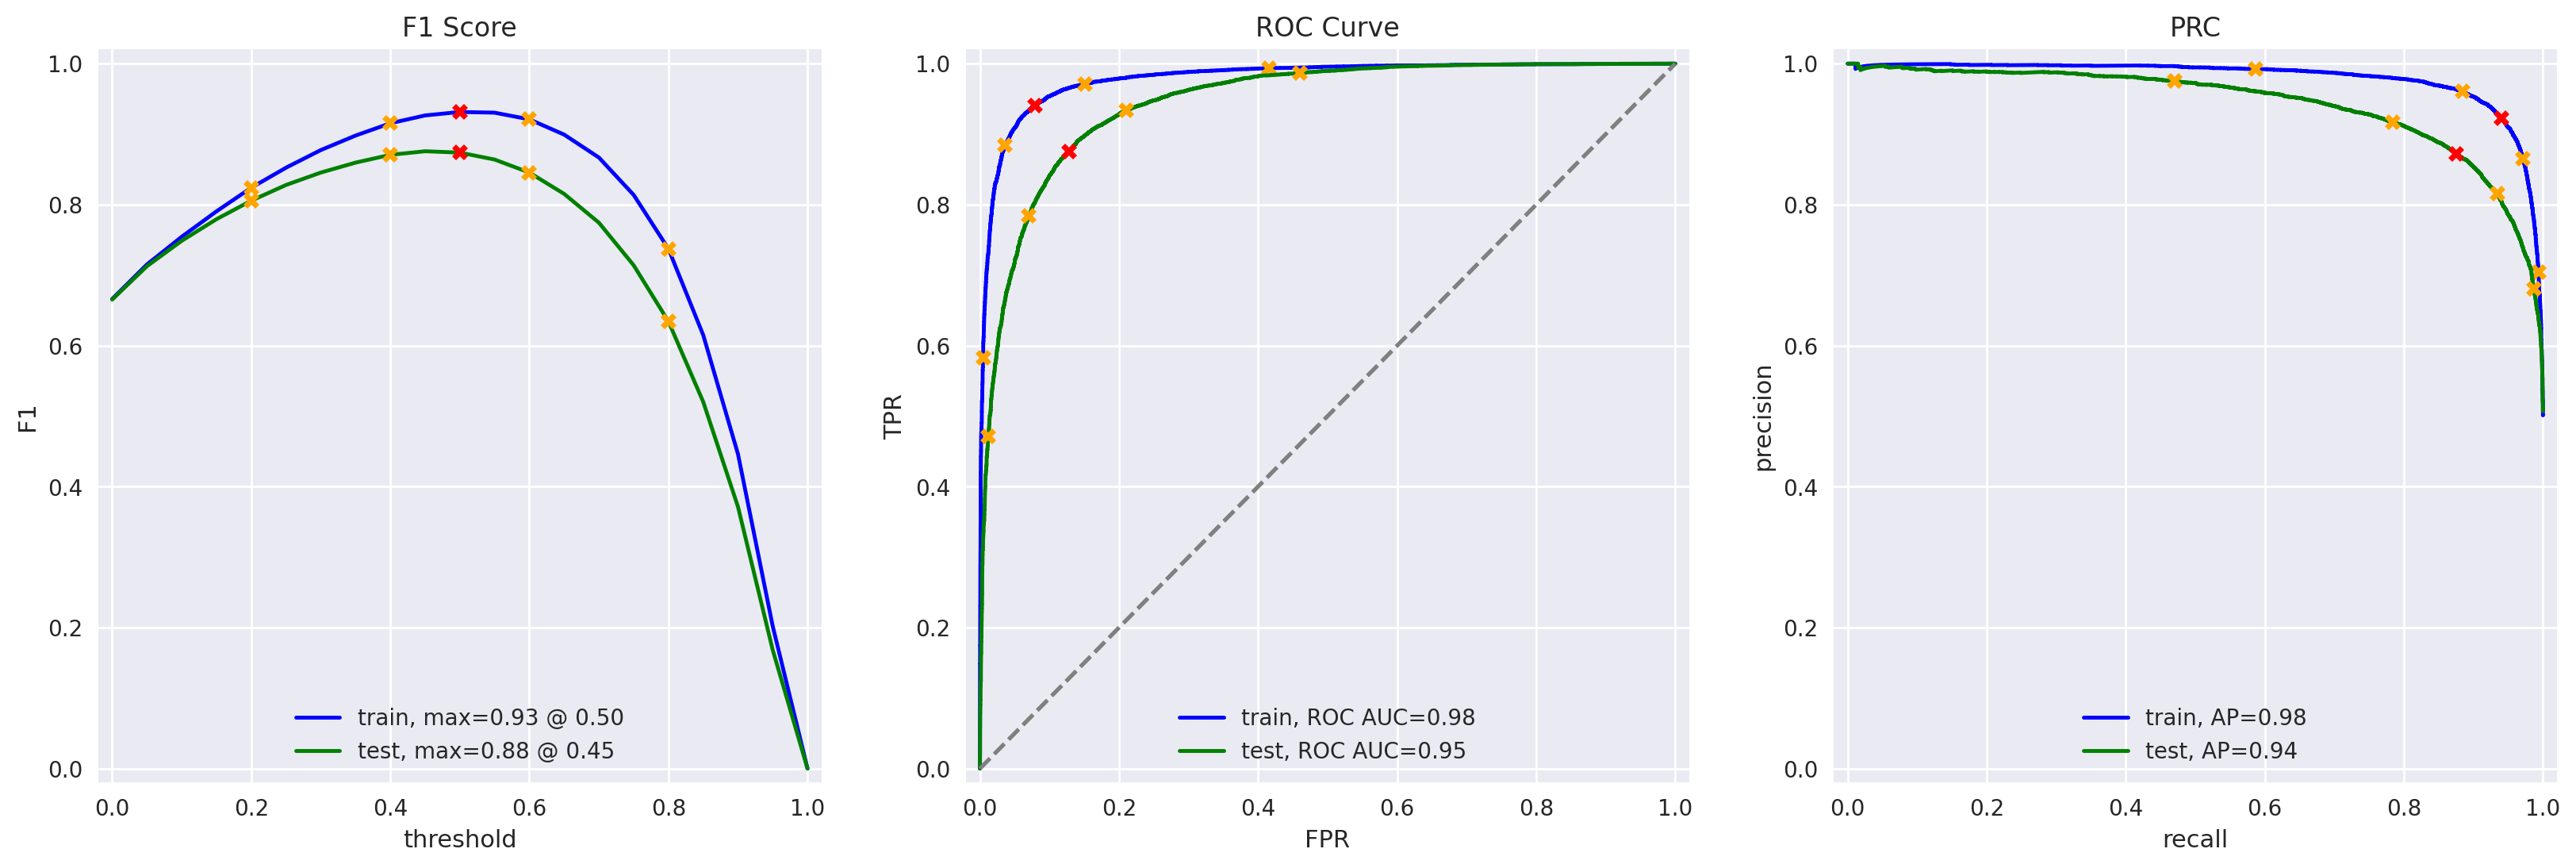

In [25]:
model_2 = LogisticRegression(max_iter=1000, n_jobs=-1)
model_2.fit(X_train_tfidf_2, y_train)

evaluate_model(model_2, X_train_tfidf_2, y_train, X_test_tfidf_2, y_test)


### Model 3 - spaCy, TF-IDF and LGBMClassifier

          train  test
Accuracy   0.97  0.87
F1         0.97  0.87
APS        1.00  0.94
ROC AUC    1.00  0.94


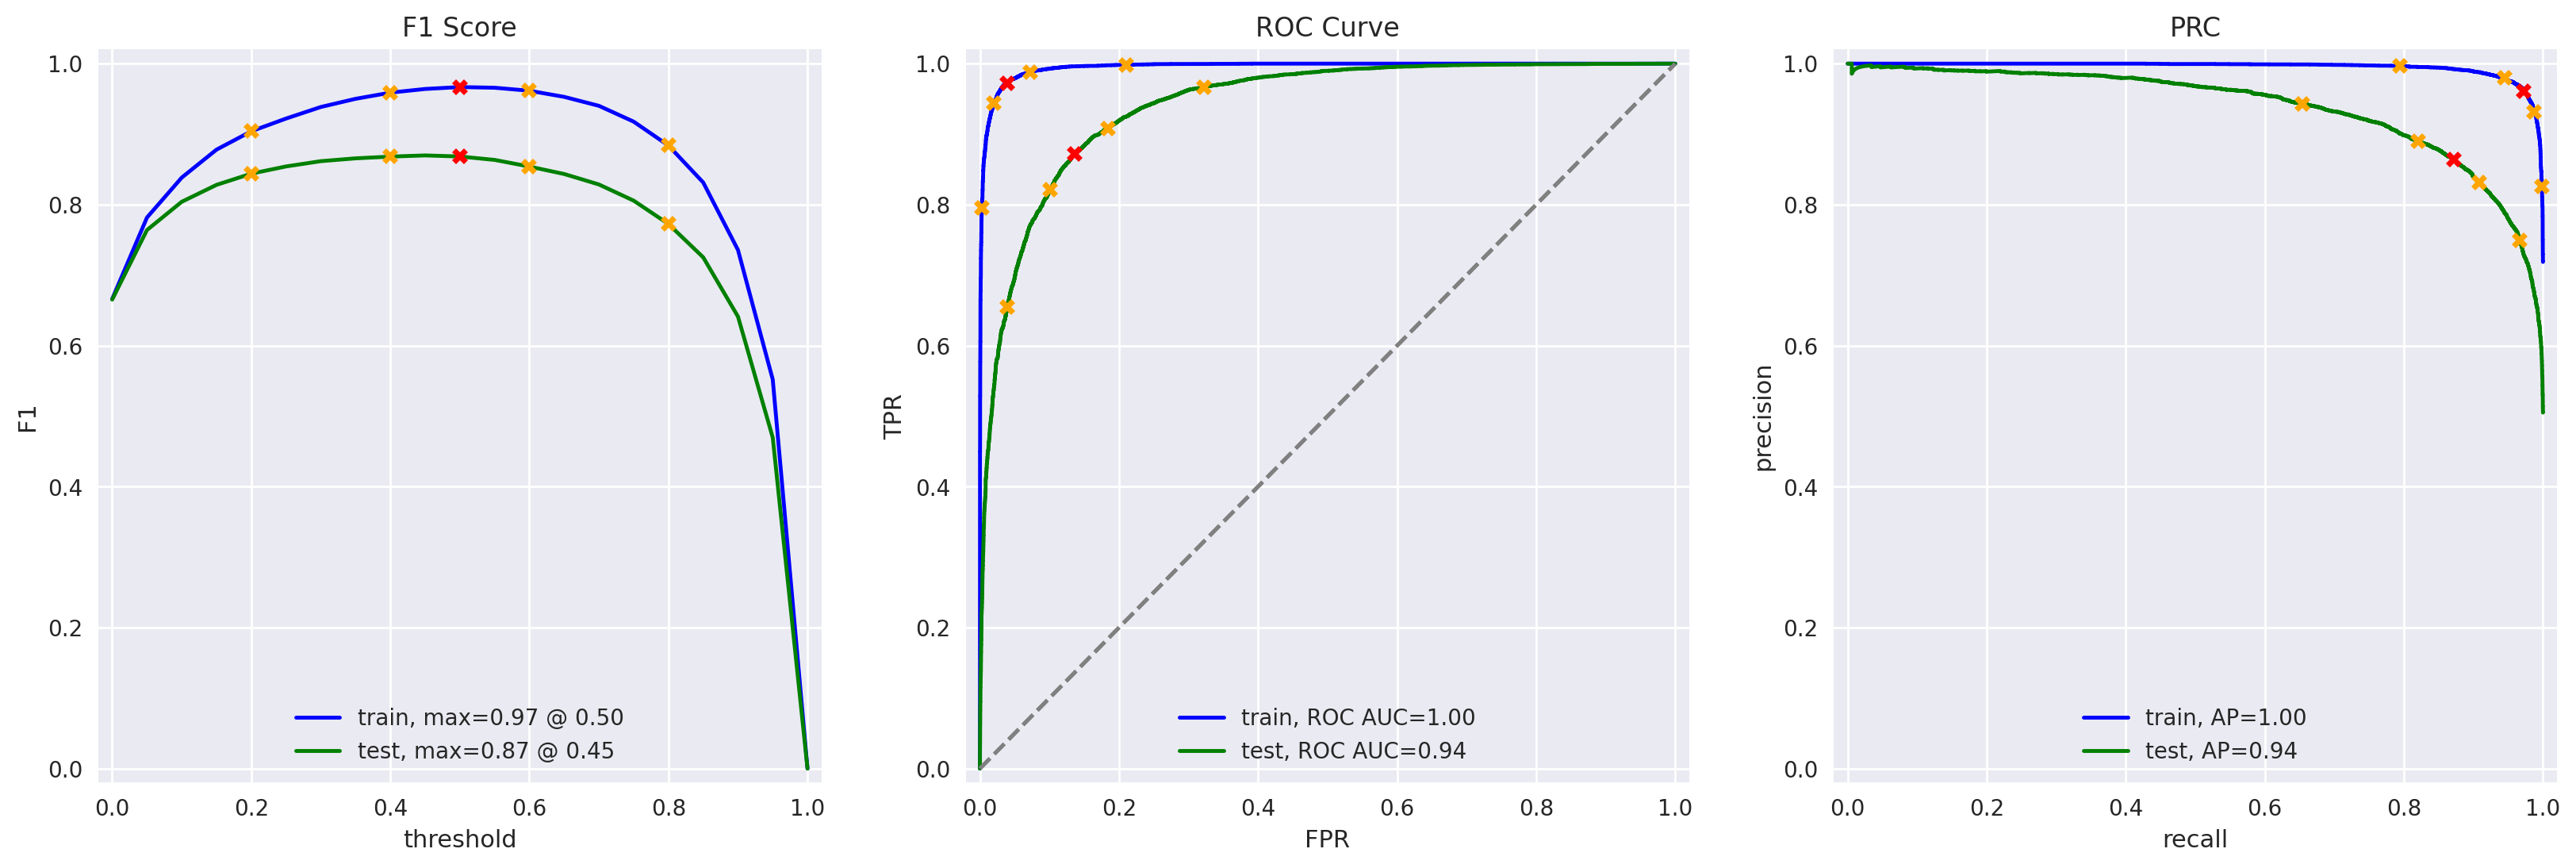

In [26]:
from lightgbm import LGBMClassifier

model_3 = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42,
    n_jobs=-1
)

model_3.fit(X_train_tfidf_2, y_train)

evaluate_model(model_3, X_train_tfidf_2, y_train, X_test_tfidf_2, y_test)


## My Reviews

In [27]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].astype(str).apply(normalize_text)

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didn t expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...


### Model 1

In [28]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_1.predict_proba(tfidf_1.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.09:  i did not simply like it not my kind of movie
0.06:  well i was bored and felt asleep in the middle of the movie
0.56:  i was really fascinated with the movie
0.18:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.24:  i didn t expect the reboot to be so good writers really cared about the source material
0.43:  the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.04:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.88:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 2

In [29]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_2.predict_proba(tfidf_2.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.21:  i did not simply like it not my kind of movie
0.08:  well i was bored and felt asleep in the middle of the movie
0.52:  i was really fascinated with the movie
0.16:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.20:  i didn t expect the reboot to be so good writers really cared about the source material
0.49:  the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.04:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.92:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Model 3

In [30]:
texts = my_reviews['review_norm']

tfidf_3 = tfidf_2
my_reviews_pred_prob = model_3.predict_proba(tfidf_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.52:  i did not simply like it not my kind of movie
0.21:  well i was bored and felt asleep in the middle of the movie
0.59:  i was really fascinated with the movie
0.31:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.44:  i didn t expect the reboot to be so good writers really cared about the source material
0.62:  the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.26:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.90:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


## Conclusions

Three models were evaluated for sentiment classification:

1. **Model 1 — TF-IDF + Logistic Regression**
2. **Model 2 — spaCy (lemmatization) + TF-IDF + Logistic Regression**
3. **Model 3 — spaCy + TF-IDF + LightGBM Classifier**

All three models achieved similar quantitative performance on the test set, with F1 scores around **0.87–0.88** and ROC AUC values around **0.94–0.95**. Model 3 achieved a test ROC AUC of **0.94**.

Although overall metrics were close, qualitative differences appeared in probability calibration and how each model handled negative sentiment.

---

### Quantitative Summary

| Model | Test F1 | Test ROC AUC | Observations |
|-------|---------|-------------|-------------|
| Model 1 | ~0.88 | ~0.95 | Strong negative sensitivity |
| Model 2 | ~0.87 | ~0.95 | Slightly softer negative calibration |
| Model 3 | ~0.87 | ~0.94 | Conservative toward negativity |

---

### Qualitative Behavior Differences

While Model 1 and Model 2 produced similar overall results, a key difference emerged in how they handled mild negativity.

For the review:

> "I did not simply like it. Not my kind of movie."

- **Model 1** predicted ~0.08  
- **Model 2** predicted ~0.21  

Model 2 assigned a probability approximately 10 points higher than Model 1, indicating it was less harsh in penalizing subtle negative phrasing. This was the most defining qualitative difference between the two Logistic Regression models.

Model 3 (LightGBM) diverged more clearly in negative calibration:

- For the same review, Model 3 predicted ~0.52  
  (essentially neutral rather than negative)

This indicates Model 3 was significantly less sensitive to negative sentiment intensity.

---

### Positive Sentiment Behavior

For clearly positive reviews such as:

> "Launching on Netflix was a brave move & I really appreciate being able to binge..."

Predictions were very similar:

- Model 1: ~0.88  
- Model 2: ~0.92  
- Model 3: ~0.90  

All models handled strong positive sentiment consistently and effectively.

The primary differentiation between models occurred in their treatment of negative sentiment rather than positive sentiment.

---

### Computational Observations

- **Model 2 (spaCy + LR)** required noticeably more processing time.
- **Model 1 (TF-IDF + LR)** trained efficiently.
- **Model 3 (LightGBM)** trained at a speed comparable to Model 1 and did not present significant computational delay.

---

### Final Assessment

Although all models achieved similar evaluation metrics, Model 1 demonstrated:

- Strong negative sensitivity
- Balanced probability calibration
- Efficient training
- Consistent performance across qualitative examples

Model 2 performed similarly but was slightly less harsh in detecting subtle negativity.

Model 3 performed well overall but showed weaker discrimination of negative sentiment intensity.

Given both quantitative performance and qualitative behavior, **Model 1 (TF-IDF + Logistic Regression)** is selected as the preferred model for this task.

This demonstrates that a well-constructed linear baseline with TF-IDF can perform competitively without requiring more complex architectures.


# Checklist

- [x]  Notebook was opened
- [x]  The text data is loaded and pre-processed for vectorization
- [x]  The text data is transformed to vectors
- [x]  Models are trained and tested
- [x]  The metric's threshold is reached
- [x]  All the code cells are arranged in the order of their execution
- [x]  All the code cells can be executed without errors
- [x]  There are conclusions